# Life Expectancy Projection Based on Educational Spending
Ryan Barrett

Matt Taylor

Rowena Terrado

# Introduction
The purpose of this project is to determine the effect of education levels on a country's life expectancy rates.

We will predict life expectancy using the educational spending and literacy features of the dataset.

# Choice of Dataset
https://www.kaggle.com/mmattson/who-national-life-expectancy

This dataset is the World Health Organization (WHO)'s nation life expectancy dataset, from the years 2000 - 2016 for 183 countries. It was compiled by the WHO using data from the Global Health Organization (GHO) and United Nations Educational Scientific and Culture Organization (UNESCO).

In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')   # 'talk' for slightly larger

df = pd.read_csv("https://raw.githubusercontent.com/ryan-barrett/ds/main/who_life_exp.csv")

# Preprocessing

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [39]:
df.describe()

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,2542.000000,3092.000000,3092.000000,3092.000000,3079.000000,1780.000000,130.000000,2429.000000,3011.000000,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.00000,571.000000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,85.436271,85.540427,86.608991,86.420116,83.332011,19.866038,2.044878,13397.146974,3.122935,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.53293,81.984472,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,17.099786,15.282246,14.943226,15.332160,19.255119,14.071207,5.059339,16258.593973,2.091720,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.75428,19.665588,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,2.000000,16.000000,8.000000,19.000000,18.695210,0.128000,0.000000,250.000000,0.062360,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.78744,14.376040,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,81.000000,79.000000,81.000000,82.000000,71.658310,6.391250,0.535162,2540.000000,1.533445,4.238797,2.195106e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.26283,72.701130,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,92.000000,92.000000,93.000000,93.000000,91.994080,20.523500,1.072725,7460.000000,2.601300,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.42541,90.953740,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,97.000000,96.000000,97.000000,97.000000,98.552870,30.981750,2.104830,18250.000000,4.278110,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.49498,95.786975,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,99.000000,99.000000,99.000000,99.000000,100.000010,79.541000,56.446950,123860.000000,12.062730,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.05908,99.998190,14.378800


In [40]:
print(df.isnull().sum())

country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64


Remove data for Countries that have no data

In [41]:
# Average education spending for each country
eduData = df.groupby('country')['une_edu_spend'].mean()
eduData = eduData.to_frame()
eduData.reset_index(inplace=True)

# Countries with no data
noData = eduData[eduData['une_edu_spend'].isna()]['country']

# Drop countries with no data
data = df.drop(df[df['country'].isin(noData)].index)

Fill countries with some NaN records with the average of the existing records

In [42]:
# Fill the rest of the NaN with the averages
data['edu_spend'] = data['une_edu_spend'].fillna(data.groupby('country')['une_edu_spend'].transform('mean'))

# Exploration and Visualization

##Average Life Expectancy by Region

Text(0.5, 1.0, 'Average Life Expectancy by Region')

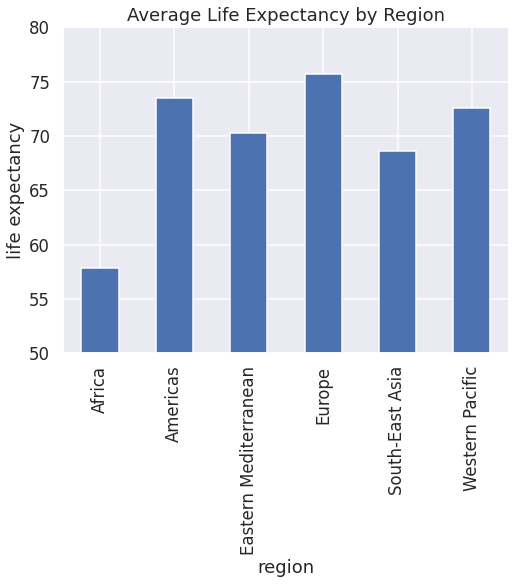

In [43]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

ax = data.groupby('region')['life_expect'].mean().plot.bar().set(ylim=(50, 80))
plt.ylabel('life expectancy')
plt.xlabel('region')
plt.title('Average Life Expectancy by Region')

##Average Education Expenditure as % of GDP by Region

Text(0.5, 1.0, 'Average Education Expenditure as % of GDP by Region')

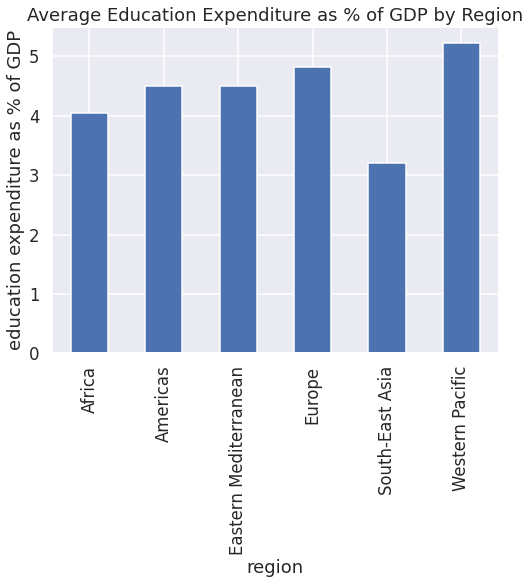

In [44]:
ax = data.groupby('region')['edu_spend'].mean().plot.bar()
plt.ylabel('education expenditure as % of GDP')
plt.xlabel('region')
plt.title('Average Education Expenditure as % of GDP by Region')

Average Literacy Rate by Region

Text(0.5, 1.0, 'Average Literacy Rate by Region')

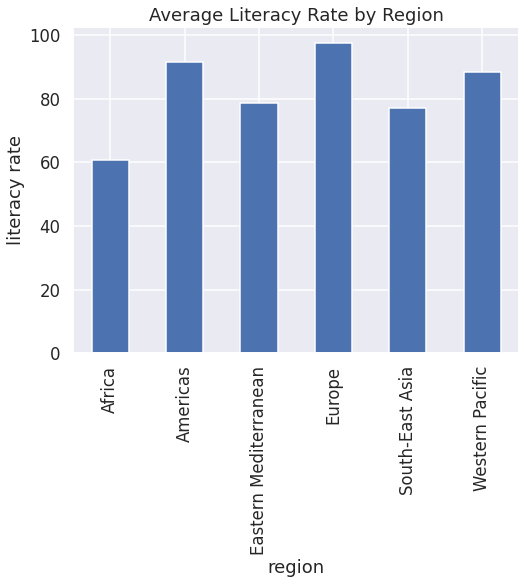

In [45]:
ax = data.groupby('region')['une_literacy'].mean().plot.bar()
plt.ylabel('literacy rate')
plt.xlabel('region')
plt.title('Average Literacy Rate by Region')

##Average Life Expectancy vs. Education Expenditure per Country

[Text(0, 0.5, 'average life expectancy (years)'),
 Text(0.5, 0, 'education expenditure (% of GDP)'),
 Text(0.5, 1.0, 'Average Life Expectancy vs. Education Expenditure')]

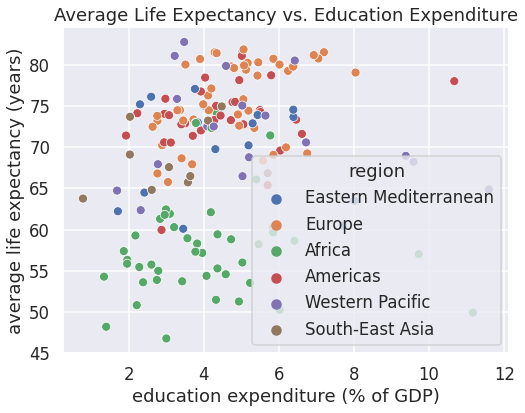

In [46]:
country_avg = data.groupby(['country', 'region'])['edu_spend'].mean().reset_index()
country_avg['life_expect'] = data.groupby('country')['life_expect'].mean().reset_index()['life_expect']
ax = sns.scatterplot(x='edu_spend', y='life_expect', data=country_avg, hue='region')
ax.set(xlabel='education expenditure (% of GDP)', ylabel='average life expectancy (years)', title='Average Life Expectancy vs. Education Expenditure')

# Machine Learning Work

rmse: 0.19


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'predicted vs actual values')

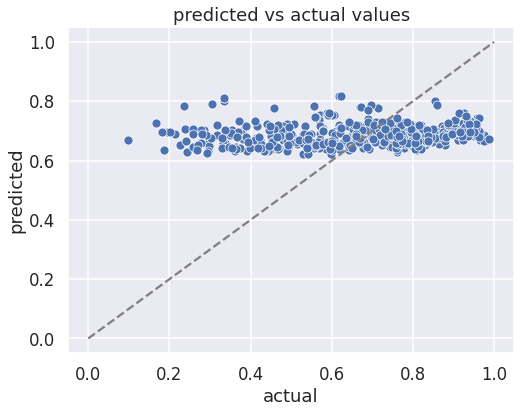

In [47]:
scaler = MinMaxScaler()
y = scaler.fit_transform(data['life_expect'].values.reshape(-1, 1))
temp = []

for v in y:
  temp.append(v[0])

y = temp

# y = data['life_expect'].values
predictors = ['edu_spend']
X = data[predictors].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)
errors = y_test - predicted
rmse = np.sqrt((errors ** 2).mean())
print('rmse: {:0.2f}'.format(rmse))

sns.scatterplot(y_test, predicted)

plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('predicted vs actual values')


# With additional literacy predictor

rmse: 0.13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'predicted vs actual values')

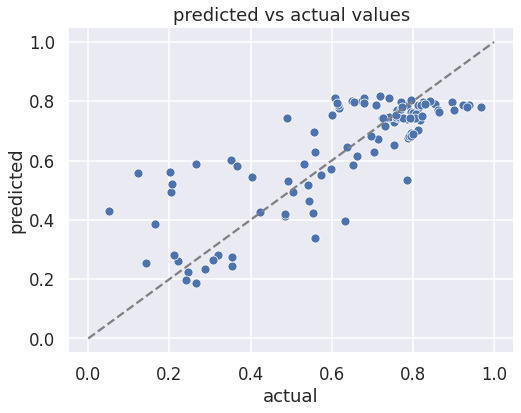

In [48]:
scaler = MinMaxScaler()
data2 = data[data['une_literacy'].notna()]

y = scaler.fit_transform(data2['life_expect'].values.reshape(-1, 1))
temp = []

for v in y:
  temp.append(v[0])

y = temp

predictors = ['edu_spend', 'une_literacy']
X = data2[predictors].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)
errors = y_test - predicted
rmse = np.sqrt((errors ** 2).mean())
print('rmse: {:0.2f}'.format(rmse))

sns.scatterplot(y_test, predicted)

plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('predicted vs actual values')

